<a href="https://colab.research.google.com/github/Atharv-gupta11/ML_Lab/blob/main/housingScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np

class ScratchLinearRegression:

    def __init__(self):
        """Initializes the ScratchLinearRegression model."""
        self.coefficients = None

    def fit(self, X, y):
        # Add a intercept
        X_b = np.c_[np.ones((X.shape[0], 1)), X]

        # Calculate the coefficients using the normal equation:
        # coefficients = (X_b^T * X_b)^-1 * X_b^T * y
        try:
            # np.linalg.inv computes the inverse of a matrix.
            # X_b.T computes the transpose of the X_b matrix.
            # @ is the matrix multiplication operator.
            self.coefficients = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
        except np.linalg.LinAlgError:
            # Handle cases where the matrix is singular and cannot be inverted.
            # This can happen if there is perfect multicollinearity in the data.
            print("Error: The matrix is singular and cannot be inverted. "
                  "This may be due to multicollinearity in your data.")
            self.coefficients = None

    def predict(self, X):

        if self.coefficients is None:
            raise Exception("The model has not been fitted yet. "
                            "Please call the 'fit' method before making predictions.")

        # Add a bias term to the input features.
        X_b = np.c_[np.ones((X.shape[0], 1)), X]

        # Make predictions using the calculated coefficients.
        # The prediction is the dot product of the input features (with bias)
        # and the coefficients.
        predictions = X_b @ self.coefficients
        return predictions

In [4]:
from google.colab import files

# Open file upload dialog
uploaded = files.upload()

# If CSV file:
import pandas as pd
housing_data  = pd.read_csv(list(uploaded.keys())[0])
housing_data .head()

Saving Housing.csv to Housing.csv


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [10]:


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# --- Data Loading and Preprocessing (from the notebook) ---
# Assuming 'housing_data' is your preprocessed DataFrame
# ... (code for loading and cleaning the data would go here)




# Scaling the data
scaler = MinMaxScaler()
num_vars = ['price', 'area', 'bedrooms']
housing_data[num_vars] = scaler.fit_transform(housing_data[num_vars])

# Defining X and Y
X = housing_data[['area', 'bedrooms']]
y = housing_data['price']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

# Convert to NumPy arrays
X_train_np = X_train.values
y_train_np = y_train.values
X_test_np = X_test.values
y_test_np = y_test.values


# --- Using the ScratchLinearRegression Class ---

# 1. Create an instance of the model
scratch_model = ScratchLinearRegression()

# 2. Fit the model to the training data
scratch_model.fit(X_train_np, y_train_np)

# 3. Print the coefficients
print("Coefficients from scratch model:")
print(scratch_model.coefficients)

# 4. Make predictions on the test data
predictions = scratch_model.predict(X_test_np)
print("\nPredictions:")
print(predictions)

# 5. (Optional) Evaluate the model (e.g., using R-squared)
# You would need to implement this function from scratch as well if not using libraries.
def r2_score_scratch(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred)**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    return 1 - (ss_res / ss_tot)

r2 = r2_score_scratch(y_test_np, predictions)
print(f"\nR-squared from scratch: {r2:.4f}")



Coefficients from scratch model:
[0.00277095 0.55915944 0.32180134]

Predictions:
[0.17876064 0.29866287 0.4627214  0.27253033 0.32267142 0.23410013
 0.38377544 0.38377544 0.26504676 0.31941518 0.22046773 0.28713381
 0.2395469  0.6675928  0.26545917 0.30191911 0.42066844 0.22468473
 0.31979948 0.27463367 0.24101756 0.29000575 0.18959795 0.2343026
 0.18567807 0.12612158 0.30576213 0.27944777 0.34708492 0.36302314
 0.08058179 0.23102571 0.18626485 0.14395319 0.30020008 0.26176987
 0.20796759 0.22026526 0.14322302 0.24101756 0.1397643  0.19490132
 0.38608126 0.16031414 0.17568622 0.21124448 0.27944777 0.14207011
 0.1766573  0.38981931 0.11555327 0.29097683 0.33612199 0.33709307
 0.31211344 0.22661656 0.31403495 0.1589794  0.13822709 0.33996501
 0.133413   0.18913679 0.34380803 0.32172099 0.32823348 0.35338747
 0.57208343 0.1766573  0.13149149 0.40432528 0.12823524 0.32420863
 0.2294885  0.23717454 0.31019193 0.25695578 0.53595904 0.47831374
 0.46217306 0.2863652  0.42758587 0.14302055 0.1


Model Accuracy (R-squared score): 0.3637


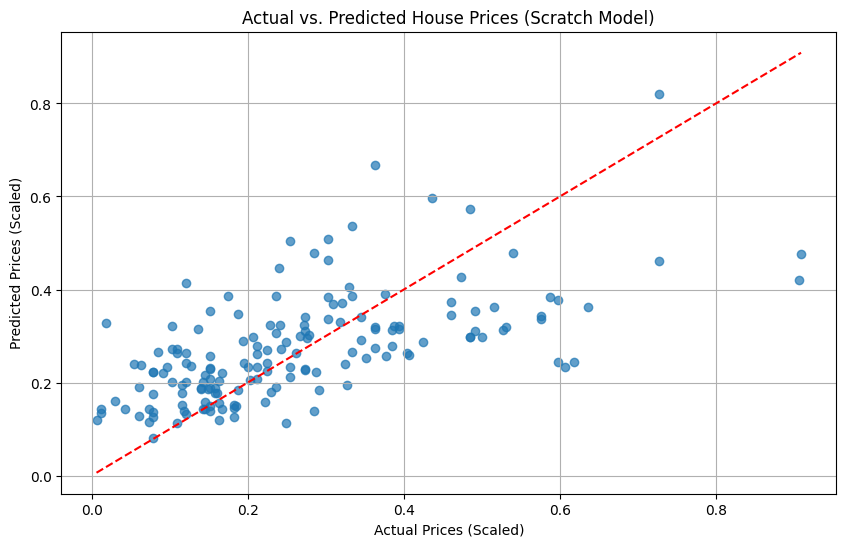

In [12]:
import matplotlib.pyplot as plt
import numpy as np # Import numpy here as well for the r2_score_scratch function

# --- Model Evaluation (R-squared) ---

# R-squared function from scratch
def r2_score_scratch(y_true, y_pred):
    """Calculates the R-squared score from scratch."""
    # Sum of squared residuals
    ss_res = np.sum((y_true - y_pred)**2)
    # Total sum of squares

    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    return 1 - (ss_res / ss_tot)

r2 = r2_score_scratch(y_test_np, predictions) # Corrected variable name
print(f"\nModel Accuracy (R-squared score): {r2:.4f}")

# --- Visualization of Results ---
plt.figure(figsize=(10, 6))
plt.scatter(y_test_np, predictions, alpha=0.7) # Corrected variable name
plt.xlabel("Actual Prices (Scaled)")
plt.ylabel("Predicted Prices (Scaled)")
plt.title("Actual vs. Predicted House Prices (Scratch Model)")

# Add a line for perfect predictions (y = x)
plt.plot([min(y_test_np), max(y_test_np)], [min(y_test_np), max(y_test_np)], color='red', linestyle='--')
plt.grid(True)
plt.show()